---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 6

---
Please write your full name here
- **Name** : "Hanya Ahmad Samy"

# Part 1 PCA

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


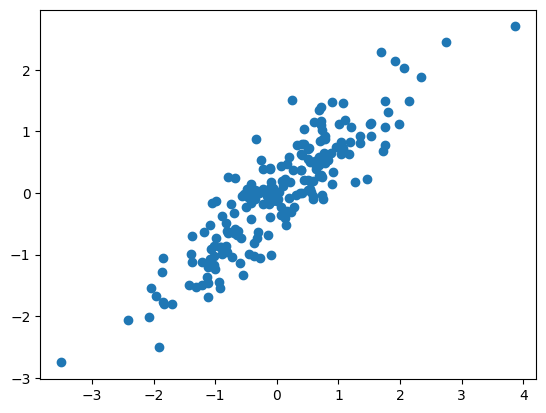

In [ ]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
#### YOUR FUNCTION
def pca(X):
    # center the data
    mean = np.mean(X, axis=0)
    centered_data = X - mean

    # calculate covariance matrix
    cov_matrix = np.cov(centered_data.T)

    # calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # sort eigenvectors by eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:,idx]

    # transform data
    X_transformed = np.dot(centered_data, sorted_eigenvectors)

    return sorted_eigenvectors, sorted_eigenvalues, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X)

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


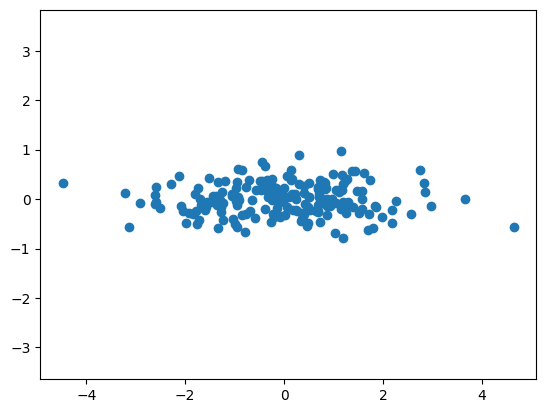

In [ ]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.axis('equal');

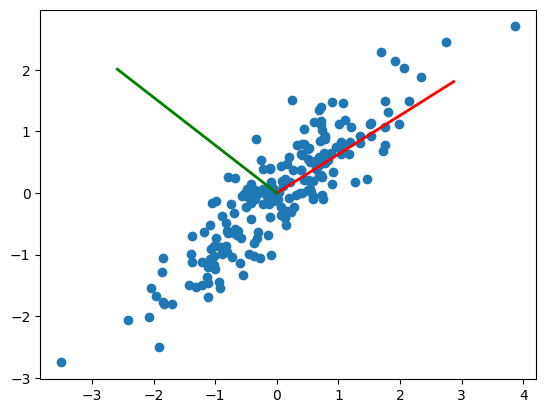

In [ ]:
### Plot eigenvectors over ORIGINAL data
plt.scatter(X[:, 0], X[:, 1])
plt.plot([0, sorted_eigenvectors[0,0]*max(X[:,0])], [0, sorted_eigenvectors[1,0]*max(X[:,1])], 'r-', linewidth=2)
plt.plot([0, sorted_eigenvectors[0,1]*max(X[:,0])], [0, sorted_eigenvectors[1,1]*max(X[:,1])], 'g-', linewidth=2)
plt.axis('equal');

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_)

[1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)

transformed_data = pca.transform(X)
print(transformed_data.shape)


(200, 1)


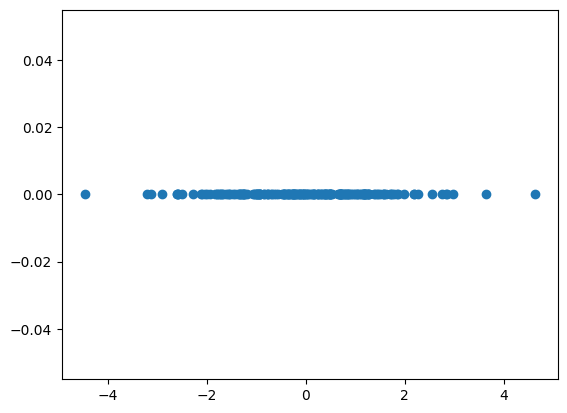

In [ ]:
plt.scatter(transformed_data[:,0], np.zeros_like(transformed_data[:,0]))
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [ ]:
import matplotlib.patches as mpatches
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

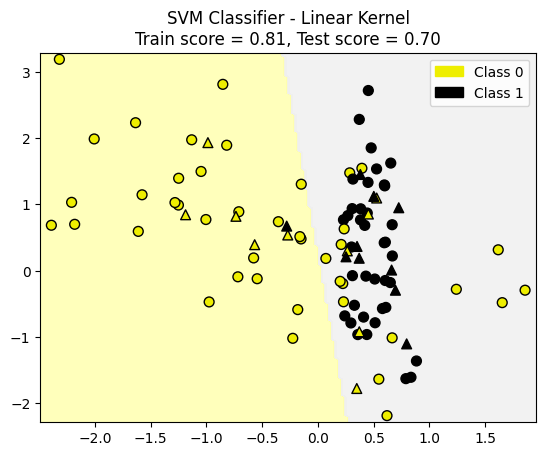

In [ ]:

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

plot_class_regions_for_classifier(svm, X_train, y_train, X_test, y_test, title='SVM Classifier - Linear Kernel', target_names=['Class 0', 'Class 1'])

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

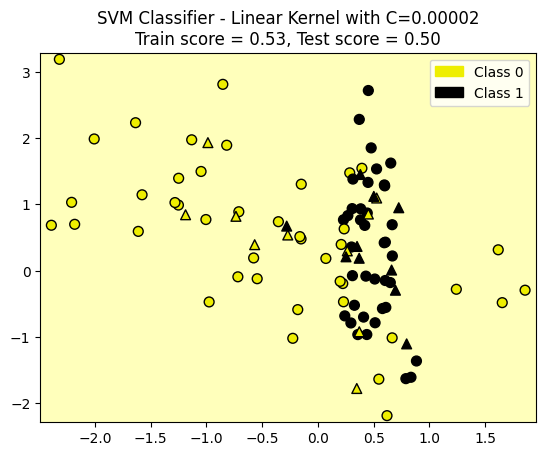

In [ ]:
svm1 = SVC(kernel='linear', C=0.00002)
svm1.fit(X_train, y_train)
plot_class_regions_for_classifier(svm1, X_train, y_train, X_test, y_test, title='SVM Classifier - Linear Kernel with C=0.00002', target_names=['Class 0', 'Class 1'])

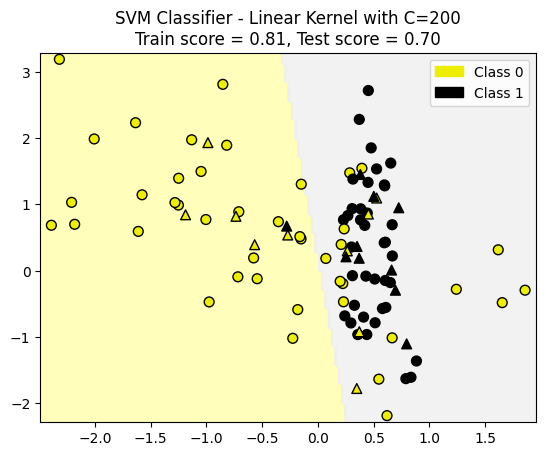

In [ ]:
svm2 = SVC(kernel='linear', C=200)
svm2.fit(X_train, y_train)
plot_class_regions_for_classifier(svm2, X_train, y_train, X_test, y_test, title='SVM Classifier - Linear Kernel with C=200', target_names=['Class 0', 'Class 1'])

# Comment on the results
The first SVM classifier with C=0.00002 has a very low regularization parameter, so it underfits the data. As we can see from the plot, this classifier creates a very simple decision boundary that does not capture the complex structure of the data. On the other hand, the second SVM classifier with C=200 has a high regularization parameter, so it overfit the data. As we can see from the plot, this classifier creates a very complex decision boundary that captures the structure of the data too well so it may not generalize well to new data. Overall, we need to strike a balance by choosing an appropriate regularization parameter.

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_table('./fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [ ]:
X_fruits = fruits.iloc[:,1:]
y_fruits = fruits.iloc[:,:1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits.iloc[:,3:5], y_fruits, test_size=0.20, random_state=42)
svm = LinearSVC(random_state=42, C=10)
svm.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

Four SVM models have been trained, because LinearSVC uses one-vs-all approach when dealing with a multiclass classification problem.

In [ ]:
print("Coefficients:", svm.coef_)
print("Intercept:", svm.intercept_)

Coefficients: [[ 0.76048347 -0.22459715]
 [ 1.18717003 -1.70338354]
 [ 0.3183943  -0.0062549 ]
 [-1.71656282  1.14746624]]
Intercept: [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Linear SVM Classification')

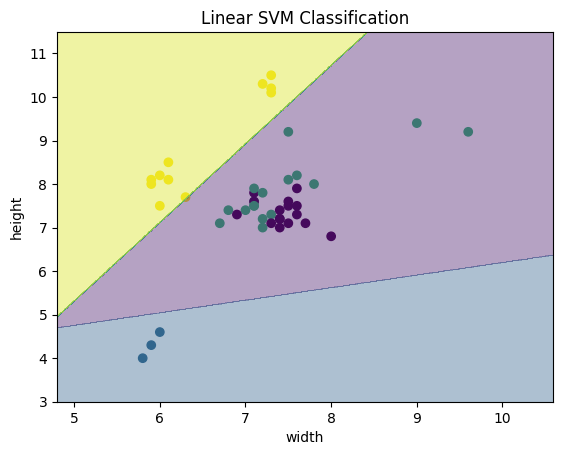

In [ ]:
# Define the meshgrid for plotting
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot the training data
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train['fruit_label'])

# Plot the decision boundary of the SVM
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
# Set the plot limits and labels
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('width')
plt.ylabel('height')
plt.title('Linear SVM Classification')


In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.20, random_state=42)
parameters = {'kernel': ('poly', 'rbf'), 'C': [0.01, 0.1, 0.5, 1, 10]}
svm_clf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_clf, parameters)
grid_search.fit(X_train, y_train)
print("Best C value:", grid_search.best_params_['C'])


Best C value: 10


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
svm_model = SVC(C=10)
svm_model.fit(X_train, y_train)

# Calculate and print the training and testing accuracy
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

print('Accuracy of SVC on training set: {:.2f}'.format(train_accuracy))
print('Accuracy of SVC on test set: {:.2f}'.format(test_accuracy))

Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.95


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cancer)
# remove highly correlated features
corr_matrix = np.corrcoef(X_scaled.T)
highly_correlated = np.where(np.abs(corr_matrix) > 0.95)
to_remove = []
for i in range(len(highly_correlated[0])):
    if highly_correlated[0][i] != highly_correlated[1][i] and \
       highly_correlated[0][i] not in to_remove:
        to_remove.append(highly_correlated[1][i])
X_filtered = np.delete(X_scaled, to_remove, axis=1)
# select most important features
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_filtered, y_cancer)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_cancer, test_size=0.2,random_state=42)
svm_modified = SVC(C=10)
svm_modified.fit(X_train, y_train)
train_accuracy_mod = svm_modified.score(X_train, y_train)
test_accuracy_mod = svm_modified.score(X_test, y_test)

In [ ]:
print('Accuracy of SVC on training set: {:.2f}'.format(train_accuracy_mod))
print('Accuracy of SVC on test set: {:.2f}'.format(test_accuracy_mod))

Accuracy of SVC on training set: 0.99
Accuracy of SVC on test set: 0.97
